<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-1-Sprint-4-Build-Week-1/blob/master/Unit_1_Build_Week_Bo_Warburton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Racial Justice in Connecticut Department of Children and Families Child Welfare Placements from July 1, 2015 to June 30, 2016

Abstract

Making reasonable efforts to keep extended families together is recognized as an important part of achieving successful outcomes in child welfare social work. In this article, I look at data regarding placement in relative care by the Connecticut Department of Children and Families (DCF) and ask if ethnicity affects placement type.

Background

In 1990 DCF settled a class-action lawsuit alleging "dangerous and unlawful policies and practices" by signing a consent decree. That agreement mandated 22 outcome measures and appointed a federal monitor. DCF also awarded American Management Systems (with partners) a $13 million systems integration and custom application develoment project to build a statewide computer system called LINK. I was a business systems analyst on that project.

Data

The dataset, made possible by LINK, lists initial placement type by month, DCF office, and ethnicity.

Question

Does DCF treat children impartially with regard to placing them with extended family? In the language of statistics, my null hypothesis is that all children are equally likely to be placed with relatives.

Findings

The dataset has DCF office, region, ethnicity, and initial placement by month. The raw numbers shown here indicate that that Hispanic and White children are placed with extended family more often than Other and Black. My rationale for including the margin of error is that this data, being from one fiscal year, is a sample of all possible years.

Visualization: Raw numbers indicate favorable treatment of White and Hispanic

Of course, raw numbers aren't as important as percentages. The charts below show placement rates as percentage of total placements for the entire time period and by month.

Visualization: Percentages indicate favorable treatment of White, but not Hispanic

The table below showw the results of ANOVA testing and leads me to fail to reject the null hypothesis and state that ethnicity does not affect placement in relative care.

Table: ANOVA tests


Conclusion

Does a failure to reject the null hypothesis mean that DCF is achieving perfect racial justice? Hardly. I don't know what percentage of each population wind up in DCF custody or what happens after initial placement. Rejecting the null hypothesis could mean several things, and I won't speculate here.

## Data wrangling

### Import examine the data

In [0]:
import numpy as np
import pandas as pd

In [3]:
df_original = pd.read_csv('https://raw.githubusercontent.com/BoWarburton/data/master/dcf.csv')
df_original.head(10)

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
0,08/06/2015,Other,Other,BLACK,2005,77,3,2,0,0,2,0,1,45,0,1,23,0,0,Race
1,08/06/2015,Other,Other,HISPANIC,2005,70,6,0,0,0,1,0,2,41,0,2,18,0,0,Race
2,08/06/2015,Other,Other,OTHER,2005,23,0,0,0,0,0,0,0,21,0,0,2,0,0,Race
3,08/06/2015,Other,Other,WHITE,2005,61,2,5,0,0,1,0,4,40,0,1,8,0,0,Race
4,08/06/2015,Region 1,Bridgeport Office,BLACK,2005,126,64,12,1,3,19,11,2,10,2,0,1,1,0,Race
5,08/06/2015,Region 1,Bridgeport Office,HISPANIC,2005,105,54,21,1,1,15,2,2,6,0,0,2,0,1,Race
6,08/06/2015,Region 1,Bridgeport Office,OTHER,2005,12,6,0,1,1,3,1,0,0,0,0,0,0,0,Race
7,08/06/2015,Region 1,Bridgeport Office,WHITE,2005,53,22,3,0,1,12,3,1,9,0,2,0,0,0,Race
8,08/06/2015,Region 1,Norwalk Office,BLACK,2005,27,6,10,1,1,4,1,0,4,0,0,0,0,0,Race
9,08/06/2015,Region 1,Norwalk Office,HISPANIC,2005,20,7,7,0,0,1,1,1,3,0,0,0,0,0,Race


In [4]:
# 966 rows, four (one for each ethnicity) for each month in the period
df_original.shape

(966, 20)

In [5]:
# Each row has an integer for placements in one month by ethnicity, office, and region
df_original.dtypes

Data_as_of                 object
DCF Region                 object
DCF Office                 object
Demographic                object
SFY                         int64
TOTAL_ENTRY                 int64
FOSTER_CARE                 int64
RELATIVE_CARE               int64
SPECIAL_STUDY               int64
THERAPEUTIC_FOSTER_CARE     int64
PDC_SAFE_HOME               int64
SHELTER                     int64
GROUP_HOME                  int64
RESIDENTIAL                 int64
DCF_HIGHMEADOWS             int64
DCF_SOLNIT                  int64
DCF_CJTS                    int64
HOSPITAL                    int64
INDEPENDENT_LIVING          int64
Demographic_Type           object
dtype: object

In [6]:
# There are no null values to be cleaned up
df_original.isnull().sum()

Data_as_of                 0
DCF Region                 0
DCF Office                 0
Demographic                0
SFY                        0
TOTAL_ENTRY                0
FOSTER_CARE                0
RELATIVE_CARE              0
SPECIAL_STUDY              0
THERAPEUTIC_FOSTER_CARE    0
PDC_SAFE_HOME              0
SHELTER                    0
GROUP_HOME                 0
RESIDENTIAL                0
DCF_HIGHMEADOWS            0
DCF_SOLNIT                 0
DCF_CJTS                   0
HOSPITAL                   0
INDEPENDENT_LIVING         0
Demographic_Type           0
dtype: int64

In [7]:
df_original.describe(include=[np.number])

,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,2011.808489,38.890269,16.948240,8.331263,1.387164,1.041408,3.057971,1.607660,0.760870,2.783644,0.072464,0.386128,1.075569,1.024845,0.413043
std,4.080482,39.466052,19.235207,10.122565,2.163570,1.959260,5.431891,2.361677,1.353468,4.864568,0.316928,0.770555,3.020394,1.920547,0.931985
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,10.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,25.000000,10.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,55.000000,23.000000,12.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2018.000000,220.000000,129.000000,57.000000,14.000000,18.000000,40.000000,14.000000,10.000000,45.000000,3.000000,6.000000,34.000000,18.000000,9.000000


In [8]:
df_original.describe(exclude=[np.number])

,Data_as_of,DCF Region,DCF Office,Demographic,Demographic_Type
count,966,966,966,966,966
unique,3,8,22,8,1
top,09/19/2017,Region 3,Bridgeport Office,Hispanic,Race
freq,524,179,60,150,966


In [9]:
df_original['DCF Office'].value_counts()

Bridgeport Office       60
Meriden Office          60
Waterbury Office        60
Norwich Office          60
Willimantic Office      60
Manchester Office       60
Hartford Office         60
Milford Office          60
New Haven Office        60
Norwalk Office          60
New Britain Office      60
Danbury Office          59
Middletown Office       59
Torrington Office       55
Stamford Office         37
Unassigned_Office       32
Other                   24
Gen'l Administration    22
Hotline                  9
Aftercare                6
Spec Invest. Unit        2
Treatment Services       1
Name: DCF Office, dtype: int64

In [10]:
# All the values in Demographic_Type are 'Race', I can probably drop this
df_original.Demographic_Type.value_counts()

Race    966
Name: Demographic_Type, dtype: int64

In [11]:
# Ethnicities seem to be coded differently, why is this?
df_original['Demographic'].value_counts()

Hispanic              150
Non-Hispanic White    150
Non-Hispanic Black    146
Non-Hispanic Other    137
HISPANIC               96
WHITE                  96
OTHER                  96
BLACK                  95
Name: Demographic, dtype: int64

In [12]:
df_original[df_original['DCF Office']=='Hotline']

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
461,09/19/2017,Region 0,Hotline,Hispanic,2012,4,1,3,0,0,0,0,0,0,0,0,0,0,0,Race
462,09/19/2017,Region 0,Hotline,Non-Hispanic Black,2012,3,0,0,0,0,3,0,0,0,0,0,0,0,0,Race
597,09/19/2017,Region 0,Hotline,Non-Hispanic Other,2014,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Race
659,09/19/2017,Region 0,Hotline,Hispanic,2015,1,0,1,0,0,0,0,0,0,0,0,0,0,0,Race
660,09/19/2017,Region 0,Hotline,Non-Hispanic Black,2015,2,0,1,0,0,0,1,0,0,0,0,0,0,0,Race
834,09/19/2017,Region 0,Hotline,Non-Hispanic White,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,Race
837,09/19/2017,Region 0,Hotline,Hispanic,2017,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Race
898,09/19/2017,Region 0,Hotline,Non-Hispanic White,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,Race
901,09/19/2017,Region 0,Hotline,Hispanic,2017,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Race


In [13]:
df_original.SFY.value_counts()

2017    128
2012     72
2011     72
2013     67
2014     65
2010     64
2009     64
2007     64
2006     64
2005     64
2008     63
2016     60
2015     60
2018     59
Name: SFY, dtype: int64

In [14]:
df_original['Data_as_of'].value_counts()

09/19/2017    524
08/06/2015    383
11/07/2018     59
Name: Data_as_of, dtype: int64

In [15]:
df_original[df_original['Data_as_of']=='11/07/2018'].head()

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
907,11/07/2018,Region 3,Willimantic Office,Hispanic,2018,35,21,6,2,0,0,3,0,0,0,0,0,2,1,Race
908,11/07/2018,Region 4,Manchester Office,Non-Hispanic White,2018,82,26,42,2,1,3,0,0,0,0,1,0,6,1,Race
909,11/07/2018,Region 1,Bridgeport Office,Hispanic,2018,56,15,21,3,10,0,0,0,6,0,0,1,0,0,Race
910,11/07/2018,Region 6,New Britain Office,Non-Hispanic White,2018,67,13,43,3,1,1,0,0,0,0,0,0,6,0,Race
911,11/07/2018,Region 1,Norwalk Office,Non-Hispanic Black,2018,26,8,10,5,0,0,0,1,1,0,0,0,0,1,Race


In [16]:
df_original[df_original['SFY']==2010].head()

,Data_as_of,DCF Region,DCF Office,Demographic,SFY,TOTAL_ENTRY,FOSTER_CARE,RELATIVE_CARE,SPECIAL_STUDY,THERAPEUTIC_FOSTER_CARE,PDC_SAFE_HOME,SHELTER,GROUP_HOME,RESIDENTIAL,DCF_HIGHMEADOWS,DCF_SOLNIT,DCF_CJTS,HOSPITAL,INDEPENDENT_LIVING,Demographic_Type
319,08/06/2015,Other,Other,BLACK,2010,58,2,0,0,0,0,0,10,24,0,0,22,0,0,Race
320,08/06/2015,Other,Other,HISPANIC,2010,41,4,1,0,0,2,0,2,18,0,0,14,0,0,Race
321,08/06/2015,Other,Other,OTHER,2010,6,0,0,0,0,3,0,0,2,0,0,1,0,0,Race
322,08/06/2015,Other,Other,WHITE,2010,31,0,0,0,0,0,0,2,23,0,0,6,0,0,Race
323,08/06/2015,Region 1,Bridgeport Office,BLACK,2010,73,27,13,2,3,8,11,1,5,0,0,2,1,0,Race


Notes and data cleaning action items

[  ] The dataset, 966 rows, each row giving numbers of children by type of placement, ethnicity, "data as of", and DCF office, is a pivot table, so I will need to put it in "tidy" format before doing some things

[ ] There are no null values to worry about

[ ] There seems to be a discrepancy in the way they coded ethnicity, I will need to figure that out and fix it

[ ] "Data as of" is a string which I need to convert to datetime if I want to do any date-based analysis

[ ] Capitalization and spacing is inconsistent; I will put column names in lowercase and replace spaces with underscores for convenience

[ ]"TOTAL_ENTRY" is a pre-engineered feature, the sum of all other placement types

[ ] I thought "SFY" would be State Fiscal Year, but it does not correspond to the dates in "Data_as_of"; I need to find out what's going on

[ ] "Demographic_Type" only has one value, presumably because this is a data dump from a larger database with other demographic types, so I will dump it

After data cleaning, we will have 966 rows and 19 columns. Of the columns, one is a date, three are categorical, and 15 are numerical and continuous. The latter 15 would be categorical if this data were in tidy format.

### Remove redundant column

In [17]:
# Make a simpler dataframe name and drop the column Demographic_Type
df_dcf = df_original
drop_columns = ['Demographic_Type']
df_dcf = df_dcf.drop(columns = drop_columns)
df_dcf.shape

(966, 19)

### Fix column names

In [18]:
# Put column names in lower case
df_dcf.columns = map(str.lower, df_dcf.columns)
# Replace spaces in column names with underscores
df_dcf = df_dcf.rename(columns = {'dcf region':'dcf_region', 'dcf office':'dcf_office'})
df_dcf.dtypes

data_as_of                 object
dcf_region                 object
dcf_office                 object
demographic                object
sfy                         int64
total_entry                 int64
foster_care                 int64
relative_care               int64
special_study               int64
therapeutic_foster_care     int64
pdc_safe_home               int64
shelter                     int64
group_home                  int64
residential                 int64
dcf_highmeadows             int64
dcf_solnit                  int64
dcf_cjts                    int64
hospital                    int64
independent_living          int64
dtype: object

### Find and fix inconsistent coding

In [19]:
# To recap: "Demographic" has values in UPPER CASE and Title Case
df_dcf.demographic.value_counts()

Hispanic              150
Non-Hispanic White    150
Non-Hispanic Black    146
Non-Hispanic Other    137
HISPANIC               96
WHITE                  96
OTHER                  96
BLACK                  95
Name: demographic, dtype: int64

In [20]:
# Are the upper-case rows meant to be repeats, samples, or independent values?
df_dcf.loc[(df_dcf['demographic'] == 'Hispanic') | (df_dcf['demographic'] == 'HISPANIC')].sort_values(by=['data_as_of'])

,data_as_of,dcf_region,dcf_office,demographic,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
1,08/06/2015,Other,Other,HISPANIC,2005,70,6,0,0,0,1,0,2,41,0,2,18,0,0
276,08/06/2015,Region 2,New Haven Office,HISPANIC,2009,81,45,11,0,2,14,2,0,5,0,1,0,1,0
272,08/06/2015,Region 2,Milford Office,HISPANIC,2009,19,11,2,0,0,1,1,2,1,0,0,0,0,1
268,08/06/2015,Region 1,Stamford Office,HISPANIC,2009,31,16,2,0,4,6,1,0,0,0,0,0,1,1
264,08/06/2015,Region 1,Norwalk Office,HISPANIC,2009,30,12,3,0,3,5,6,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,11/07/2018,Region 2,New Haven Office,Hispanic,2018,53,33,8,3,3,2,0,1,2,0,0,0,0,1
909,11/07/2018,Region 1,Bridgeport Office,Hispanic,2018,56,15,21,3,10,0,0,0,6,0,0,1,0,0
907,11/07/2018,Region 3,Willimantic Office,Hispanic,2018,35,21,6,2,0,0,3,0,0,0,0,0,2,1
927,11/07/2018,Region 1,Norwalk Office,Hispanic,2018,29,16,6,4,1,0,0,0,1,0,0,0,1,0


In [21]:
# Answer seems to be that they are values from different years. I want to see
# what happens when I look at rows where foster_care is the same.
condition = (df_dcf.foster_care == 16)
df_dcf[condition].head(10)

,data_as_of,dcf_region,dcf_office,demographic,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
27,08/06/2015,Region 3,Middletown Office,WHITE,2005,71,16,17,3,0,18,6,1,8,0,0,0,1,1
45,08/06/2015,Region 5,Danbury Office,HISPANIC,2005,32,16,5,2,0,5,1,1,2,0,0,0,0,0
91,08/06/2015,Region 3,Middletown Office,WHITE,2006,68,16,9,1,5,11,3,3,15,2,1,0,1,1
111,08/06/2015,Region 5,Danbury Office,WHITE,2006,38,16,11,0,0,4,2,0,4,0,1,0,0,0
124,08/06/2015,Region 6,New Britain Office,BLACK,2006,37,16,4,2,0,9,2,2,1,0,0,0,0,1
182,08/06/2015,Region 5,Waterbury Office,OTHER,2007,22,16,3,0,0,1,0,0,2,0,0,0,0,0
219,08/06/2015,Region 3,Middletown Office,WHITE,2008,42,16,8,1,1,1,7,2,4,0,1,0,1,0
268,08/06/2015,Region 1,Stamford Office,HISPANIC,2009,31,16,2,0,4,6,1,0,0,0,0,0,1,1
302,08/06/2015,Region 5,Danbury Office,WHITE,2009,41,16,9,3,0,3,2,1,2,0,1,0,4,0
399,09/19/2017,Region 1,Bridgeport Office,Non-Hispanic White,2011,32,16,8,0,0,3,1,0,3,0,0,0,1,0


In [0]:
# So, even in cases where "WHITE" and "Non-Hispanic White" both showed 16 foster_care,
# they were from different offices different State Fiscal Year.
# So I can standardize "Non-Hispanic Black" to "black" and so forth.
demographic_dictionary = {'HISPANIC':'hispanic', 'Hispanic':'hispanic',
      'BLACK':'black', 'Non-Hispanic Black':'black',
      'WHITE':'white', 'Non-Hispanic White':'white',
      'OTHER':'other', 'Non-Hispanic Other':'other'}
df_dcf = df_dcf.replace({'demographic': demographic_dictionary})

It appears that they switched the way they coded ethnicity around 2006. The use of "OTHER" as oppposed to "Non-Hispanic Other," for example, does not indicate that one or the other was a random sample or anything like that. Therefore, we can change the entries for consistency.

In [23]:
df_dcf.demographic.value_counts()

hispanic    246
white       246
black       241
other       233
Name: demographic, dtype: int64

## Exploratory data analysis and feature engineering

Look at basic plots, make separate dataframes for each race, perform t-tests, look at pandas.profile, possibly Seaborn plots

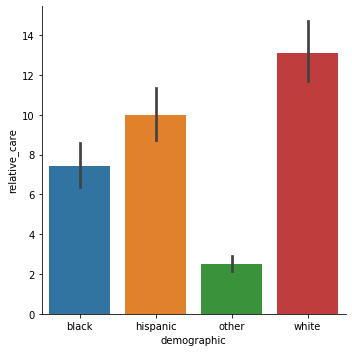

In [24]:
# White and Hispanic have higher average relative care placements per reporting unit (office-year)
import seaborn as sns
sns.catplot(x = 'demographic',
            y = 'relative_care',
            kind = 'bar',
            data = df_dcf);

In [135]:
# Numbers for the histogram above
print('Mean rate of relative care placement')
print('OVERALL', round(df_dcf.relative_care.mean(), 2))
print('Hispanic:', round(df_dcf[df_dcf['demographic'] == 'hispanic'].relative_care.mean(), 2))
print('Black:', round(df_dcf[df_dcf['demographic'] == 'black'].relative_care.mean(), 2))
print('White:', round(df_dcf[df_dcf['demographic'] == 'white'].relative_care.mean(), 2))
print('Other:', round(df_dcf[df_dcf['demographic'] == 'other'].relative_care.mean(), 2))

Mean rate of relative care placement
OVERALL 8.33
Hispanic: 9.98
Black: 7.41
White: 13.11
Other: 2.5


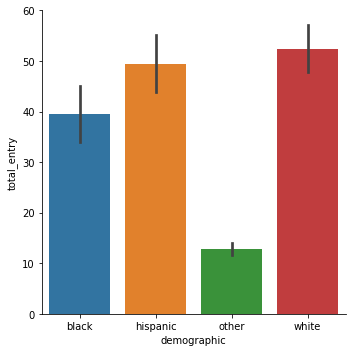

In [136]:
# But there are many more White children in care
sns.catplot(x = 'demographic',
            y = 'total_entry',
            kind = 'bar',
            data = df_dcf);

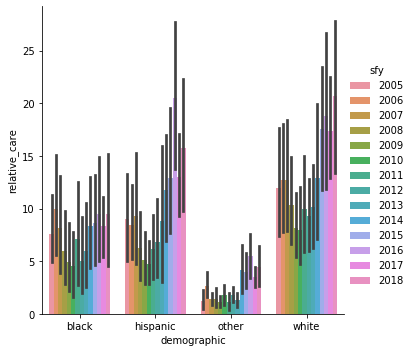

In [25]:
sns.catplot(x = 'demographic',
            y = 'relative_care',
            hue = 'sfy',
            kind = 'bar',
            data = df_dcf);

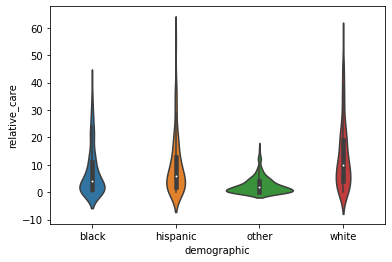

In [26]:
# Violin plot gives more detail on the difference between ethnicities.
# Specifically, White and Hispanic have a few entries with very high numbers.
sns.violinplot(x='demographic', y='relative_care', data=df_dcf);

In [27]:
df_dcf[df_dcf['demographic']=='white'].describe()

,sfy,total_entry,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,2011.873984,52.337398,21.219512,13.109756,2.105691,1.032520,3.715447,2.211382,0.902439,4.504065,0.093496,0.617886,0.569106,1.857724,0.398374
std,4.093346,38.806532,18.961201,11.934179,2.535666,1.431055,5.367355,2.423531,1.321191,5.792851,0.331044,0.943466,1.379626,2.699978,0.769201
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,22.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,41.500000,16.000000,10.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,78.000000,33.000000,19.000000,3.000000,2.000000,5.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000
max,2018.000000,189.000000,90.000000,54.000000,12.000000,8.000000,24.000000,12.000000,7.000000,40.000000,2.000000,6.000000,10.000000,18.000000,4.000000


In [0]:
# Make a column showing ratio of relative care placements to all placements for each column
df_dcf['relative_care_ratio'] = df_dcf['relative_care'] / df_dcf['total_entry']

In [29]:
df_dcf['relative_care_ratio'].describe()

count    966.000000
mean       0.204059
std        0.169165
min        0.000000
25%        0.075481
50%        0.181818
75%        0.304986
max        1.000000
Name: relative_care_ratio, dtype: float64

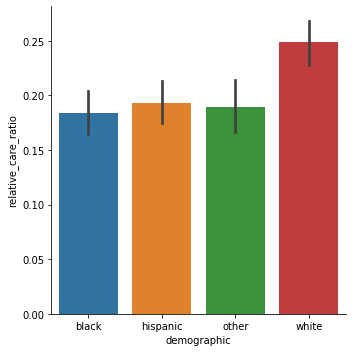

In [30]:
# As a percentage, Hispanic relative care placement rates are similar to Other and Black
sns.catplot(x = 'demographic',
            y = 'relative_care_ratio',
            kind = 'bar',
            data = df_dcf);

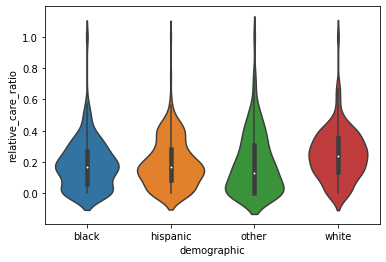

In [137]:
sns.violinplot(x='demographic', y='relative_care_ratio', data=df_dcf);

### ANOVA

Comparing multiple means with a series of pairwise comparisons is not accurate. We should use an Analysis of Variance Test or an ANOVA. This is a generalization of t-tests to more than two groups. Our null hypothesis states that there are equal means in the populations from which the groups of data were sampled. More succinctly:

𝜇1=𝜇2=...=𝜇𝑛

for 𝑛 groups of data. Our alternative hypothesis would be that any one of the equivalences in the above equation fail to be met.

In [31]:
import scipy.stats as stats
hispanic = df_dcf[df_dcf['demographic'] == 'hispanic'].relative_care
black = df_dcf[df_dcf['demographic'] == 'black'].relative_care
white = df_dcf[df_dcf['demographic'] == 'white'].relative_care
other = df_dcf[df_dcf['demographic'] == 'other'].relative_care
stats.f_oneway(hispanic, black, white, other)

F_onewayResult(statistic=54.71841609479271, pvalue=1.1661511214609272e-32)

In [79]:
# How many new entrants (placements) by year?
# df_dcf.query('demographic == black' and 'sfy == 2005')['total_entry'].sum()
print('Sum by \n', df_dcf.groupby('sfy')['total_entry'].sum())

Sum by 
 sfy
2005    3200
2006    3386
2007    3041
2008    2737
2009    2805
2010    2486
2011    2633
2012    2072
2013    1965
2014    2111
2015    1943
2016    2328
2017    4650
2018    2211
Name: total_entry, dtype: int64


In [0]:
df_summary = df_dcf.groupby(['sfy', 'demographic'])['total_entry', 'relative_care'].sum()

In [0]:
df_totals = df_dcf.groupby(['sfy', 'demographic']).sum()

In [101]:
df_totals.head()

total_entry  ...  relative_care_ratio
sfy  demographic               ...                     
2005 black                876  ...             2.452840
     hispanic             983  ...             2.481577
     other                199  ...             1.442545
     white               1142  ...             2.826799
2006 black                953  ...             2.878622

[5 rows x 15 columns]

In [0]:
df_totals = df_totals.drop(['total_entry', 'relative_care_ratio'], axis=1)

In [105]:
df_totals.head()

foster_care  relative_care  ...  hospital  independent_living
sfy  demographic                              ...                              
2005 black                360            122  ...         5                   7
     hispanic             485            144  ...         7                   7
     other                106             19  ...         1                   0
     white                482            191  ...        13                   3
2006 black                378            160  ...        10                  11

[5 rows x 13 columns]

In [106]:
# give header name to first column
df_totals = df_totals.reset_index()
df_totals

,sfy,demographic,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
0,2005,black,360,122,10,23,121,43,16,126,6,8,29,5,7
1,2005,hispanic,485,144,10,17,115,39,27,101,1,9,21,7,7
2,2005,other,106,19,2,1,26,7,0,33,2,0,2,1,0
3,2005,white,482,191,29,12,143,59,20,163,4,14,9,13,3
4,2006,black,378,160,25,28,124,29,18,104,6,7,53,10,11
5,2006,hispanic,521,135,15,24,134,32,11,74,5,11,19,10,5
6,2006,other,133,43,1,5,44,11,2,35,0,1,10,6,1
7,2006,white,479,203,37,18,134,38,25,150,8,8,10,30,5
8,2007,black,392,131,17,43,100,31,12,79,5,6,25,12,9
9,2007,hispanic,488,149,13,35,134,29,15,76,3,5,12,16,5


In [93]:
df_summary.head(20)

total_entry  relative_care
sfy  demographic                            
2005 black                876            122
     hispanic             983            144
     other                199             19
     white               1142            191
2006 black                953            160
     hispanic             996            135
     other                292             43
     white               1145            203
2007 black                862            131
     hispanic             980            149
     other                215             22
     white                984            204
2008 black                692             89
     hispanic             819            100
     other                231             23
     white                995            166
2009 black                771             79
     hispanic             901             82
     other                203             18
     white                930            131

In [97]:
# give header name to first column
df_summary2 = df_summary.reset_index()
df_summary2

,sfy,demographic,total_entry,relative_care
0,2005,black,876,122
1,2005,hispanic,983,144
2,2005,other,199,19
3,2005,white,1142,191
4,2006,black,953,160
5,2006,hispanic,996,135
6,2006,other,292,43
7,2006,white,1145,203
8,2007,black,862,131
9,2007,hispanic,980,149


In [99]:
df_summary2.shape

(56, 4)

In [0]:
df_temp = df_dcf[['sfy', 'demographic', 'total_entry', 'relative_care']].copy()

### Make a tidy summary table
I want a dataframe that shows total placements and relative care placements for each ethnicity by year. If this is in tidy format, I can get better visualizations.

In [121]:
# Tidy dataframe, index sfy, value == demographic, variables == relative_care, total_entry
# pd.melt(df_dcf, id_vars=['sfy'], value_vars=['demographic', 'total_entry'])
df_temp = df_totals
df_temp.head(5)

,sfy,demographic,foster_care,relative_care,special_study,therapeutic_foster_care,pdc_safe_home,shelter,group_home,residential,dcf_highmeadows,dcf_solnit,dcf_cjts,hospital,independent_living
0,2005,black,360,122,10,23,121,43,16,126,6,8,29,5,7
1,2005,hispanic,485,144,10,17,115,39,27,101,1,9,21,7,7
2,2005,other,106,19,2,1,26,7,0,33,2,0,2,1,0
3,2005,white,482,191,29,12,143,59,20,163,4,14,9,13,3
4,2006,black,378,160,25,28,124,29,18,104,6,7,53,10,11


In [0]:
df_temp = df_temp.melt(id_vars=['sfy', 'demographic'], var_name='placement', value_name='count')

In [124]:
df_temp.placement.value_counts()

group_home                 56
special_study              56
foster_care                56
hospital                   56
relative_care              56
therapeutic_foster_care    56
shelter                    56
dcf_solnit                 56
independent_living         56
residential                56
pdc_safe_home              56
dcf_cjts                   56
dcf_highmeadows            56
Name: placement, dtype: int64

In [125]:
df_temp.shape

(728, 4)

In [127]:
df_temp.sort_values(by='demographic').head(10)

,sfy,demographic,placement,count
0,2005,black,foster_care,360
156,2016,black,special_study,37
404,2008,black,residential,63
160,2017,black,special_study,32
400,2007,black,residential,79
164,2018,black,special_study,28
396,2006,black,residential,104
628,2008,black,hospital,7
684,2008,black,independent_living,6
168,2005,black,therapeutic_foster_care,23


In [128]:
df_temp.describe()

,sfy,count
count,728.0000,728.000000
mean,2011.5000,51.604396
std,4.0339,95.921908
min,2005.0000,0.000000
25%,2008.0000,6.000000
50%,2011.5000,16.000000
75%,2015.0000,42.000000
max,2018.0000,734.000000


In [129]:
df_temp.sfy.value_counts()

2018    52
2017    52
2016    52
2015    52
2014    52
2013    52
2012    52
2011    52
2010    52
2009    52
2008    52
2007    52
2006    52
2005    52
Name: sfy, dtype: int64

In [130]:
df_temp.dtypes

sfy             int64
demographic    object
placement      object
count           int64
dtype: object

In [131]:
# Make a tidy data table so that relative_care, demographic, and dcf_office are in rows
# After replacing these with numeric, we can do k-means to see if there are clusters
df_tidy = df_temp
df_tidy.head()

,sfy,demographic,placement,count
0,2005,black,foster_care,360
1,2005,hispanic,foster_care,485
2,2005,other,foster_care,106
3,2005,white,foster_care,482
4,2006,black,foster_care,378


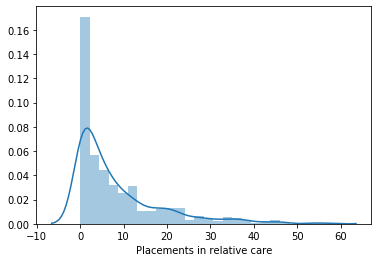

In [0]:
import seaborn as sns
# See if a Seaborn distribution plot tells us anything
x = pd.Series(df_dcf['relative_care'], name='Placements in relative care')
sns.distplot(x)

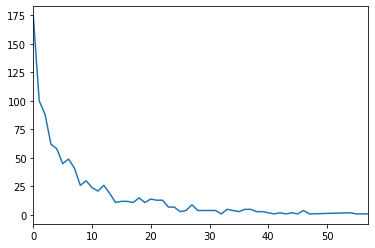

In [0]:
# Line plot shows that values for 'relative_care' are not normally distributed
df_dcf['relative_care'].value_counts().sort_index().plot()

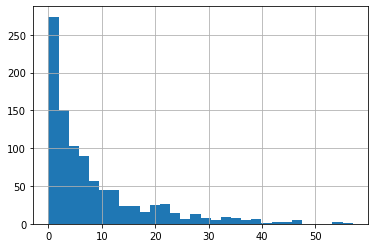

In [0]:
# Histogram shows the same thing in a different way
df_dcf['relative_care'].hist(bins=30)

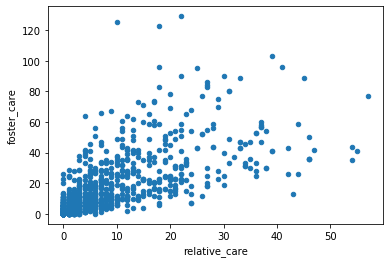

In [0]:
# I wonder if there is some linear relationship between, relative_care
# and foster_care? Seems yes...but that doesn't really get me anything
df_dcf.plot.scatter('relative_care', 'foster_care')

## Visualization: Mean rate of placement with relatives with density

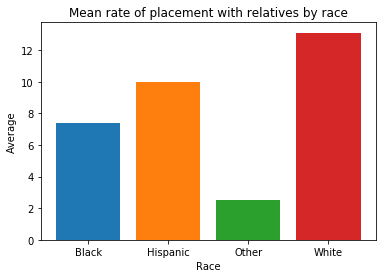

In [0]:
# Basic bar chart: what's the average relative_care placements by race?
import matplotlib.pyplot as plt
df = pd.DataFrame(df_original)
fig, ax = plt.subplots();
fig.patch.set(facecolor = 'white');
ax.set_title('Mean rate of placement with relatives by race')
ax.set_ylabel('Average')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Black','Hispanic', 'Other', 'White'])
ax.bar(x=0, height=df_black['relative_care'].mean())
ax.bar(x=1, height=df_hispanic['relative_care'].mean())
ax.bar(x=2, height=df_other['relative_care'].mean())
ax.bar(x=3, height=df_white['relative_care'].mean())
ax.set(facecolor='white');
#ax.plot(df, color='C1');
ax.set_xlabel('Race');

In [0]:
# With high t-statistics and low p-values, I reject the null hypothesis
# That Hispanic ethnicity has no effect on the chance of being placed
# In relative care.
import scipy.stats as stats
print('Two-sided t-test hispanic vs black\n', stats.ttest_ind(df_hispanic.relative_care, df_black.relative_care))
print('Two-sided t-test hispanic vs other\n', stats.ttest_ind(df_hispanic.relative_care, df_other.relative_care))
print('Two-sided t-test hispanic vs white\n', stats.ttest_ind(df_hispanic.relative_care, df_white.relative_care))

Two-sided t-test hispanic vs black
 Ttest_indResult(statistic=2.85253959981737, pvalue=0.004522385322670731)
Two-sided t-test hispanic vs other
 Ttest_indResult(statistic=10.120983498341259, pvalue=6.09170158072021e-22)
Two-sided t-test hispanic vs white
 Ttest_indResult(statistic=-3.0400697723655177, pvalue=0.0024917748663368794)


## Future directions

If I replace the strings as numbers, I could run k-means testing to look for clusters. The presumption here would be that we could get a label later indicating the success of the placement, for example did it last for six months, full course of treatment, etc.